In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [133]:
df_london = pd.read_csv('london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [134]:
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [135]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [136]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [137]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [138]:
df_london.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [141]:
sum_by_year = df_london[
    (df_london["year"] >= 2011) &
    (df_london["year"] <= 2016)
].groupby(["year"])["value"].sum()

In [147]:
sum_by_year

year
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [148]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

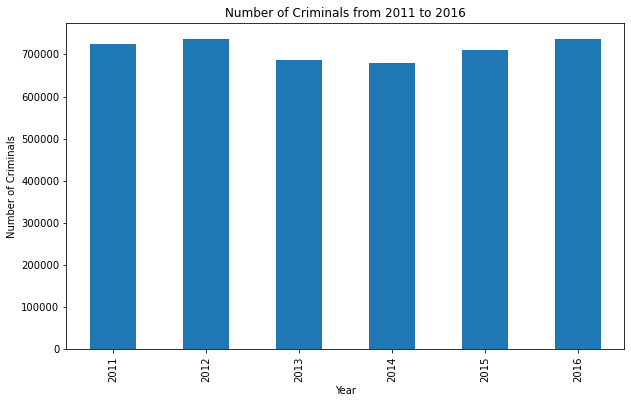

In [149]:
sum_by_year.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of Criminals')
plt.title('Number of Criminals from 2011 to 2016')

plt.show()

In [150]:
sum_by_major_category_2016 = df_london[
    (df_london["year"] == 2016)
].groupby(["major_category"])["value"].sum()

In [151]:
sum_by_major_category_2016

major_category
Burglary                        68285
Criminal Damage                 64071
Drugs                           38914
Fraud or Forgery                    0
Other Notifiable Offences       15809
Robbery                         22528
Sexual Offences                     0
Theft and Handling             294133
Violence Against the Person    232381
Name: value, dtype: int64

In [152]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(sum_by_major_category_2016)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[4 1 2 0 0 0 0 1 0 1]
[     0.   29413.3  58826.6  88239.9 117653.2 147066.5 176479.8 205893.1
 235306.4 264719.7 294133. ]


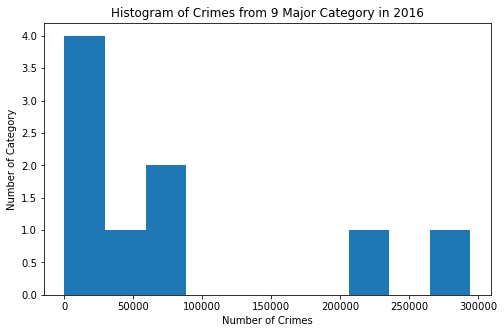

In [154]:
sum_by_major_category_2016.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Crimes from 9 Major Category in 2016')
plt.ylabel('Number of Category')
plt.xlabel('Number of Crimes')

plt.show()

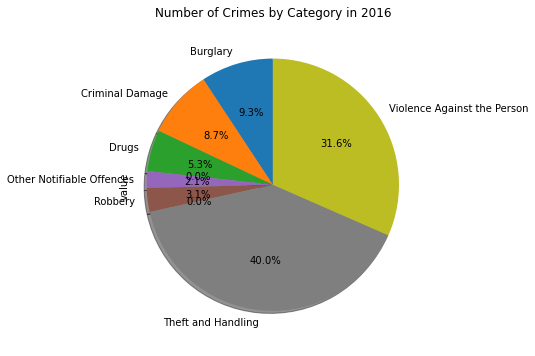

In [155]:
# autopct create %, start angle represent starting point
sum_by_major_category_2016.plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Number of Crimes by Category in 2016')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [160]:
sum_by_month_2016 = pd.DataFrame(df_london[
    (df_london["year"] == 2016)
].groupby(["month"])["value"].sum())

In [161]:
sum_by_month_2016

,value
month,
1,58847
2,56697
3,59167
4,58637
5,63990
6,62262
7,65519
8,62666
9,61412


In [163]:
sum_by_month_2016.reset_index(inplace = True)

In [164]:
sum_by_month_2016

,month,value
0,1,58847
1,2,56697
2,3,59167
3,4,58637
4,5,63990
5,6,62262
6,7,65519
7,8,62666
8,9,61412
9,10,63405


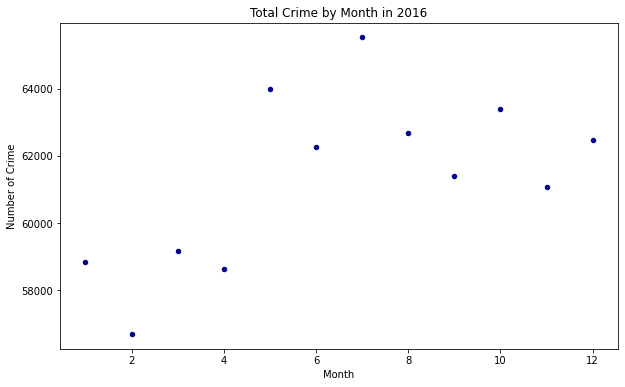

In [165]:
sum_by_month_2016.plot(kind='scatter', x='month', y='value', figsize=(10, 6), color='darkblue')

plt.title('Total Crime by Month in 2016')
plt.xlabel('Month')
plt.ylabel('Number of Crime')

plt.show()